#  PHYSICAL MODELS OF LIVING SYSTEMS

## Homework - week 2

Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------

Infer the number of species from data of a forest sampled in 1% of the total area

Perform the analysis to infer the number of species at the whole scale (p=1)


-----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
from scipy.integrate import odeint
from scipy.stats import nbinom
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import random
import matplotlib.pyplot as plt
import csv
fig, ax = plt.subplots(1, 1)
%matplotlib inline

C:\Users\ADMIN\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



Text(0, 0.5, 'No of species collected')

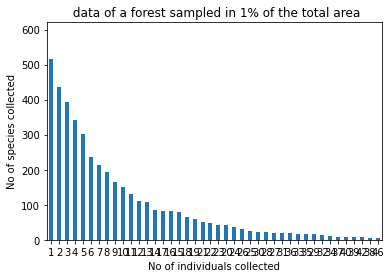

In [30]:
var = pd.read_excel('RSA_sampled_1percent.xlsx', engine='openpyxl')
x = var['Species abundance'].value_counts()[:42]
x.plot(kind='bar')
plt.title(" data of a forest sampled in 1% of the total area")
plt.xlabel("No of individuals collected")
plt.xticks(rotation=360)
plt.margins(0.2)
plt.ylabel("No of species collected")

-------------------------------------------------------------------------------------------------------------------------

   
Negative Binomial probability mass function:

 $$ P(X=k) = \binom{k+n-1}{k} p^{n} (1-p)^k $$

With the first two moments (mean and variance) being:

   $$ \mu = E(X) = n (\frac{1-p}{p}) $$
   
   $$ \sigma = var(X) = n (\frac{1-p}{p^2}) $$
   
From the above equations it follows that parameters p and n can be expressed in terms of the distribution moments as:

   $$ p = \frac{\mu}{\sigma^2}  $$
   $$ n = \frac{\mu^2}{\sigma^2-\mu} $$ 
   
Finally, from the last equation, the variance may be expressed in a slightly re-parameterized way:

   $$ \sigma^2 = \mu + \alpha \mu^2 $$
   $$ \alpha = \frac{1}{n} $$

In [31]:
import statsmodels.api as sm

X = np.ones_like(x)
res = sm.NegativeBinomial(x,X).fit(start_params=[1,1])
print(res.summary())

Optimization terminated successfully.
         Current function value: 5.600412
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
                     NegativeBinomial Regression Results                      
Dep. Variable:      Species abundance   No. Observations:                   42
Model:               NegativeBinomial   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Wed, 26 Oct 2022   Pseudo R-squ.:              -5.157e-12
Time:                        19:50:03   Log-Likelihood:                -235.22
converged:                       True   LL-Null:                       -235.22
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6158      0.175     2

n = 0.7852794218561466
p = 0.0077096218069526105


Text(0, 0.5, 'No of species collected')

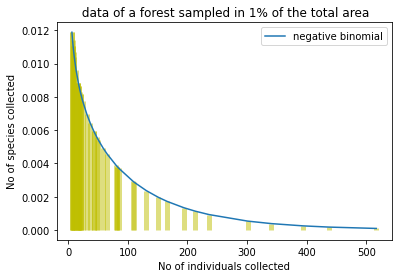

In [37]:
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

x = var['Species abundance'].value_counts()[:42]

mu = np.exp(res.params[0])
p = 1/(1+np.exp(res.params[0]) * res.params[1])
n = np.exp(res.params[0])*p/(1-p)
nbinom_pd = nbinom.pmf(x, n, p)
print("n =",n)
print("p =",p)
plt.plot(x, nbinom_pd, '-', ms=8, label='negative binomial')

plt.vlines(x, 0, nbinom_pd, colors='y', lw=5, alpha=0.5)
plt.legend()
plt.title(" data of a forest sampled in 1% of the total area")
plt.xlabel("No of individuals collected")
plt.ylabel("No of species collected")